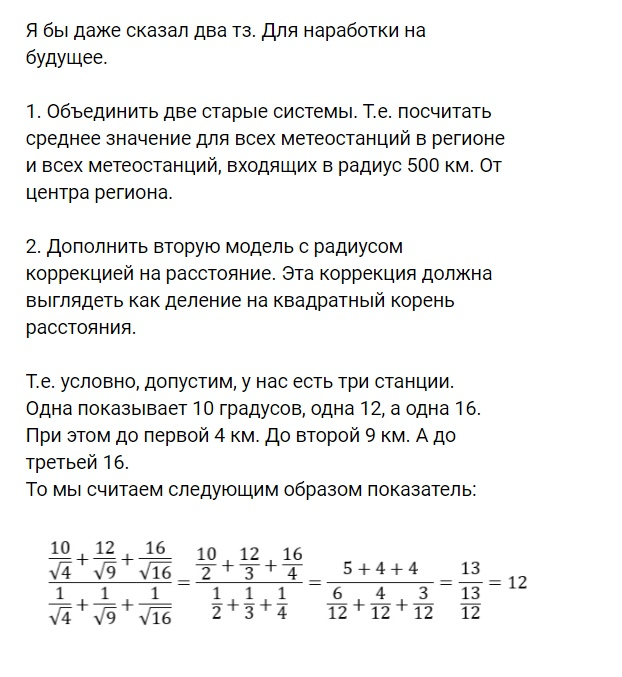

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import distance # узкоспециализированная библиотека чтоб считать расстояние зная широту и долготу

In [2]:
# задаём радиус
radius = 500

# Если мы хотим координаты ГЕОЦЕНТРА то True
# Если СТОЛИЦЫ то False
center = True

In [3]:
stations = pd.read_csv("cords_stations.csv")
# фрагмент 
stations.head()

,Широта,Долгота,Подпись,Номер метки,Код станции,Unnamed: 5,Код региона
0,"80,62","58,05","Им.Э.Т.Кренкеля, ГМО",1,20046,NaN,29
1,"79,50","76,98",Визе,2,20069,NaN,24
2,"79,55","90,62",Голомянный,3,20087,NaN,24
3,"78,07","14,25",Баренцбург,4,20107,Норвегия,0
4,"77,17","96,43",Русский,5,20289,NaN,24


In [4]:
# меняю широту и долготу в числовой формат
stations['Широта'] = stations['Широта'].replace(',','.', regex=True).values
stations['Долгота'] = stations['Долгота'].replace(',','.', regex=True).values
stations['Широта'] = stations['Широта'].astype(float)
stations['Долгота'] = stations['Долгота'].astype(float)

In [5]:
regions = pd.read_csv("cords_regions.csv")
regions.head()

,Код,Наименование,Широта столицы,Долгота столицы,Широта геоцентра,Долгота геоцентра
0,22,Алтайский край,53.3529,83.67371,51.79362,82.67585
1,28,Амурская область,50.27277,127.5404,54.6035,127.48017
2,29,Архангельская область,64.54725\n,40.56015,63.28528,42.58841
3,30,Астраханская область,46.3588,48.05993,46.13211,48.06101
4,31,Белгородская область,50.59971,36.59826,50.71069,37.75333


In [6]:
regions = regions.replace('-', np.nan, regex=True)
regions = regions[['Код','Широта столицы','Долгота столицы','Широта геоцентра', 'Долгота геоцентра']].apply(pd.to_numeric)
regions = regions.drop([14]) # потому что под 14 номером у нас байконур какой-то без координат

In [7]:
if center:
    regions = regions[["Код", "Широта геоцентра", "Долгота геоцентра"]]
    regions.columns = ["Код", "Широта", "Долгота"]
else:
    regions = regions[["Код", "Широта столицы", "Долгота столицы"]]
    regions.columns = ["Код", "Широта", "Долгота"]

In [8]:
regions.head()

,Код,Широта,Долгота
0,22,51.79362,82.67585
1,28,54.60350,127.48017
2,29,63.28528,42.58841
3,30,46.13211,48.06101
4,31,50.71069,37.75333


In [9]:
# Теперь берём температуру и осадки
rain = pd.read_fwf("rain_data\wr41430.txt", header = None)
temper = pd.read_fwf("temper_data\wr41508a1.txt", header = None)
# фрагмент 
temper.head()

,0,1,2,3
0,20046,2008,NaN,NaN
1,20046,2009,0.6,0.2
2,20046,2010,0.5,NaN
3,20046,2011,0.6,0.6
4,20046,2012,1.0,0.9


Попробуем сейчас сделать красивенько, создать нормальный фильтр для всех станций по одному региону, тру - меньше радиуса, фолс - больше радиуса

In [10]:
regions.head()

,Код,Широта,Долгота
0,22,51.79362,82.67585
1,28,54.60350,127.48017
2,29,63.28528,42.58841
3,30,46.13211,48.06101
4,31,50.71069,37.75333


In [11]:
stations.head()

,Широта,Долгота,Подпись,Номер метки,Код станции,Unnamed: 5,Код региона
0,80.62,58.05,"Им.Э.Т.Кренкеля, ГМО",1,20046,NaN,29
1,79.50,76.98,Визе,2,20069,NaN,24
2,79.55,90.62,Голомянный,3,20087,NaN,24
3,78.07,14.25,Баренцбург,4,20107,Норвегия,0
4,77.17,96.43,Русский,5,20289,NaN,24


Я проверила предыдущие вычисления (в файле 2), расстояния внизу посчитаны так же, отлично 

In [12]:
# прекрасный ванлайнер считающий таблицу расстояний 
distance_table = regions.apply(lambda x: stations.apply(lambda y: distance((x["Широта"], x["Долгота"]), (y["Широта"], y["Долгота"])).km, axis=1), axis=1)
distance_table.columns = stations["Код станции"]
distance_table.insert(0, 'Код региона', regions["Код"])
distance_table = distance_table.set_index("Код региона")
distance_table 

Код станции,20046,20069,20087,20107,20289,20292,20476,20667,20674,20744,...,38750,38763,38836,38880,38895,38927,38933,38954,38974,38987
Код региона,,,,,,,,,,,,,,,,,,,,,
22,3333.690404,3096.584100,3109.280109,3940.717886,2887.069017,3022.939891,2648.062290,2473.930841,2421.538647,2713.094108,...,2771.284244,2487.931117,1826.213787,2441.397230,2249.344595,2020.759783,1895.545740,1814.286933,2395.418774,2445.827671
28,3695.910302,3312.543493,3085.199644,4617.390480,2807.645019,2735.125500,2839.337484,3290.965090,2974.626136,3862.733369,...,5730.390309,5446.994298,4679.478177,5394.034807,5176.114828,4876.467435,4734.238868,4582.671389,5319.916687,5344.489447
29,1990.364307,2112.743517,2354.624645,1908.957244,2409.452209,2605.732299,2176.031786,1566.311217,1874.441969,1095.664989,...,2967.211812,2854.556331,3260.815613,3009.034068,3148.189870,3343.682985,3334.993675,3465.822378,3234.910852,3397.720539
30,3862.915982,3898.043642,4093.081171,3842.131646,4054.512490,4253.371890,3781.945215,3226.524060,3449.929419,2932.591316,...,1066.947777,1041.330239,1896.084557,1240.779590,1503.458742,1872.859370,1941.400901,2159.614653,1529.353437,1700.916776
31,3415.844470,3539.719277,3775.276846,3197.742753,3806.553122,4005.910121,3556.509732,2953.647685,3236.777991,2523.711379,...,1936.119840,1950.789047,2779.289411,2153.983459,2418.329789,2773.988608,2831.171903,3037.712375,2444.902934,2616.233330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4175.784622,4226.344873,4427.759281,4104.302220,4397.201671,4596.604788,4126.107362,3563.581199,3794.237064,3247.508277,...,939.651311,1011.907949,2007.069978,1222.992570,1533.357983,1948.948871,2039.970197,2272.618583,1524.871161,1688.967398
21,2755.968179,2814.165450,3025.731585,2747.399478,3019.474029,3219.965836,2756.907154,2171.695845,2428.865117,1827.671839,...,2128.749902,2020.407547,2521.340406,2181.234317,2342.266247,2579.791374,2590.272205,2748.592963,2419.324733,2585.765937
87,3275.266372,3035.877885,2774.268942,3981.676746,2711.826738,2513.202880,2963.316990,3564.338952,3288.400739,4035.148295,...,7404.437651,7157.066867,6721.819205,7184.287815,7076.313117,6912.905796,6793.680390,6713.632214,7220.273885,7301.957981


In [13]:
distance_table.to_excel('distance_table_3.xlsx', encoding = 'utf-8')

In [14]:
code = 83

# примерчик, выводим станции для региона
a = distance_table.loc[code]
b = a.loc[a < 500]
b

Код станции
20946    322.242259
22095    409.016284
22292    379.963988
23022    290.284108
23032    439.953914
23114    137.653693
23205    195.672082
23219     95.408598
23220    283.708627
23324    189.534367
23330    410.996278
23331    355.471802
23405    340.224851
23412    185.326193
23418    278.448655
23514    358.817051
23527    399.264939
Name: 83, dtype: float64

In [ ]:
# рассчеты всякие, нужны были в момент, не важно

In [15]:
c = stations[stations["Код региона"] == code]["Код станции"]
c

11    20946
26    22095
30    22165
35    22271
36    22292
60    23022
64    23114
66    23205
67    23219
Name: Код станции, dtype: int64

In [16]:
set(b.index) | set(c)

{20946,
 22095,
 22165,
 22271,
 22292,
 23022,
 23032,
 23114,
 23205,
 23219,
 23220,
 23324,
 23330,
 23331,
 23405,
 23412,
 23418,
 23514,
 23527}

In [17]:
set({20946, 22095, 22165, 22271, 22292, 23022, 23032, 23114, 23205, 23219, 23220, 23324, 23330, 23331,23405, 23412, 23418, 23514, 23527}) \
- set({23022,20946,22095,23114,23205,23219,22271,23412,23324,23418,23220,23405,23514,23527,23330,23032})

{22165, 22292, 23331}

Надо для каждого региона сформировать список станций которые в пределах 500

In [17]:
# считываю опять для столбца наименование
regions_again = pd.read_csv("cords_regions.csv")
regions_again = regions_again.drop([14])
regions_again.head()

,Код,Наименование,Широта столицы,Долгота столицы,Широта геоцентра,Долгота геоцентра
0,22,Алтайский край,53.3529,83.67371,51.79362,82.67585
1,28,Амурская область,50.27277,127.5404,54.6035,127.48017
2,29,Архангельская область,64.54725\n,40.56015,63.28528,42.58841
3,30,Астраханская область,46.3588,48.05993,46.13211,48.06101
4,31,Белгородская область,50.59971,36.59826,50.71069,37.75333


In [18]:
july_temp_mean_for_regions = pd.DataFrame(index = range(2008, 2019))
july_rain_mean_for_regions = pd.DataFrame(index = range(2008, 2019))
august_temp_mean_for_regions = pd.DataFrame(index = range(2008, 2019))
august_rain_mean_for_regions = pd.DataFrame(index = range(2008, 2019))

In [19]:
for i in regions["Код"]:
    row = distance_table.loc[i] # строка в таблице расстояний
    nearby_stations = set(row[row < radius].index) # станции в радиусе
    inside_stations = set(stations[stations["Код региона"] == i]["Код станции"]) # станции внутри
    all_stations = nearby_stations | inside_stations
    
    temper_stations = temper[temper[0].isin(all_stations)] # температурные данные по необходимым станциям
    temper_stations = temper_stations.groupby([1]).mean()[[2,3]]
    
    rain_stations = rain[rain[0].isin(all_stations)] # такие же осадки
    rain_stations = rain_stations.groupby([1]).mean()[[2,3]]
    
    july_temp_mean_for_regions[i] = temper_stations[2]
    august_temp_mean_for_regions[i] = temper_stations[3]
    july_rain_mean_for_regions[i] = rain_stations[2]
    august_rain_mean_for_regions[i] = rain_stations[3]

In [20]:
def simple_staff(df): # простая обработка до нужного вида
    df = df.T
    df.index.name = "Код региона"
    df.insert(loc=0, column='Наименование', value=list(regions_again['Наименование']))
    df.reset_index(level=0, inplace=True)
    return df

In [21]:
#simple_staff(july_temp_mean_for_regions)
july_temp_mean_for_regions = simple_staff(july_temp_mean_for_regions)
july_rain_mean_for_regions = simple_staff(july_rain_mean_for_regions)
august_temp_mean_for_regions = simple_staff(august_temp_mean_for_regions)
august_rain_mean_for_regions = simple_staff(august_rain_mean_for_regions)

august_rain_mean_for_regions

,Код региона,Наименование,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,22,Алтайский край,50.926316,38.869231,34.450000,52.910526,49.421053,65.526316,50.677778,52.182353,41.311111,51.442105,38.031579
1,28,Амурская область,59.222222,59.655556,51.711111,68.894118,35.355556,53.711765,51.100000,46.027778,65.933333,47.423529,47.777778
2,29,Архангельская область,45.056000,45.742308,52.395833,53.234615,59.419231,45.283333,61.477273,55.119231,49.459091,63.937500,45.618182
3,30,Астраханская область,13.156522,50.547826,9.508696,33.865217,30.091667,40.454167,18.200000,22.475000,15.600000,17.950000,25.970833
4,31,Белгородская область,30.828571,30.885714,25.210714,43.978571,57.964286,45.503571,32.335714,12.710714,44.571429,37.507143,12.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,20,Чеченская Республика,23.208000,48.852000,19.320000,48.552000,39.992308,44.769231,22.012000,28.276923,27.534615,28.876923,35.292308
81,21,Чувашская Республика - Чувашия,48.286207,52.889655,42.431034,29.024138,63.058621,47.872414,60.917241,44.631034,34.962069,35.306897,34.531034
82,87,Чукотский автономный округ,24.705882,44.527778,42.100000,45.355556,53.588889,47.594118,24.366667,46.227273,30.491667,31.000000,43.200000
83,89,Ямало-Ненецкий автономный округ,54.508333,41.746154,53.953846,41.730769,43.700000,46.361538,45.860000,41.161538,48.770000,63.466667,53.833333


In [22]:
july_temp_mean_for_regions.to_excel('july_temp_advansed_mean.xlsx', index = False, encoding = 'utf-8')
july_rain_mean_for_regions.to_excel('july_rain_advansed_mean.xlsx', index = False, encoding = 'utf-8')
august_temp_mean_for_regions.to_excel('august_temp_advansed_mean.xlsx', index = False, encoding = 'utf-8')
august_rain_mean_for_regions.to_excel('august_rain_advansed_mean.xlsx', index = False, encoding = 'utf-8')

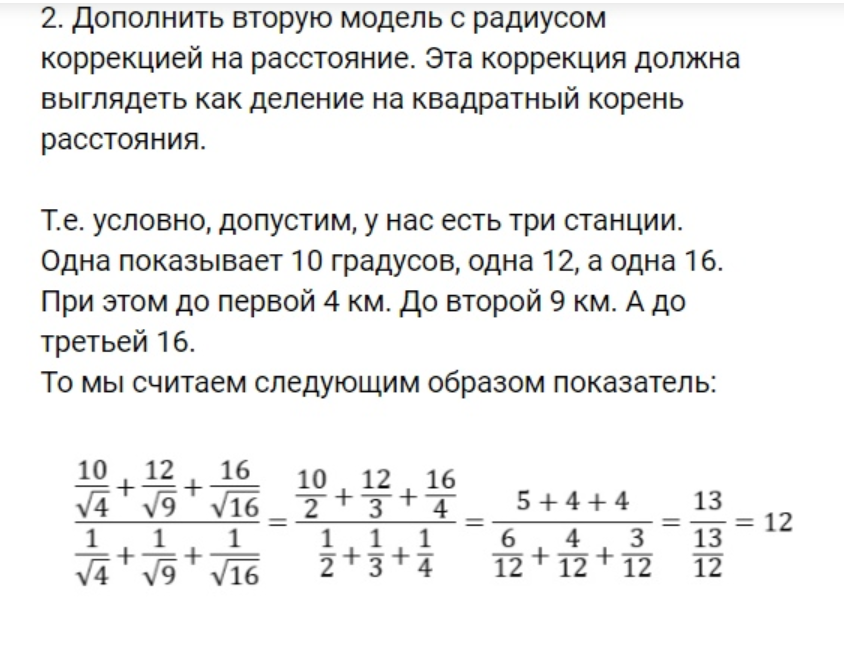

Я не до конца поняла, на всякий случай введу радиус-ограничитель. То есть дальше него суммироваться не будут станции

In [23]:
radius = 500 # за 500 км не суммируем станции
# если этого не надо, просто проставьте значение 100000000 или типа того

In [26]:
# тут будут лежать ответы
july_temp = pd.DataFrame(index = range(2008, 2019))
july_rain = pd.DataFrame(index = range(2008, 2019))
august_temp = pd.DataFrame(index = range(2008, 2019))
august_rain = pd.DataFrame(index = range(2008, 2019))

Внюмание в некоторых станциях нет данных, такова селява

для разных лет разное колво станций

In [27]:
for i in regions["Код"]:
    row = distance_table.loc[i] # строка в таблице расстояний
    row = row[row < radius] # расстояния только до нужных станций
    nearby_stations = set(row.index) # станции в радиусе
    
    temper_stations = temper[temper[0].isin(nearby_stations)] # температурные данные по необходимым станциям
    
    nearby_stations = set(temper_stations[0]) # такое переопределение - чтоб были только станции с данными
    row = row[nearby_stations]
    
    r = 1 / np.sqrt(row) # переменная для удобства
    
    # температура
    #числители, дроби которые нужно суммировать:
    top_july = temper_stations.groupby([1]).apply(lambda x: pd.Series(data = list(x[2]), index = x[0]) * r)
    top_august = temper_stations.groupby([1]).apply(lambda x: pd.Series(data = list(x[3]), index = x[0]) * r)
    
    # сложная схема, потому что мы не хотим чтоб в знаменателе были слагаемые, соответствующая которым станция дала nan
    july_temp = pd.concat([july_temp, \
                           top_july.apply(lambda x: np.nansum(x)/np.nansum(r[np.invert(np.isnan(x))]), axis = 1) \
                          ], axis=1, sort=False)
    august_temp = pd.concat([august_temp, \
                             top_august.apply(lambda x: np.nansum(x)/np.nansum(r[np.invert(np.isnan(x))]), axis = 1) \
                            ], axis=1, sort=False)
    
    
    #-------- то же самое но осадки
    row = distance_table.loc[i] # строка в таблице расстояний
    row = row[row < radius] # расстояния только до нужных станций
    nearby_stations = set(row.index) # станции в радиусе
    
    rain_stations = rain[rain[0].isin(nearby_stations)] # данные по необходимым станциям
    
    nearby_stations = set(rain_stations[0]) # такое переопределение - чтоб были только станции с данными
    row = row[nearby_stations]
    
    r = 1 / np.sqrt(row)
    
    #числители, дроби которые нужно суммировать:
    top_july = rain_stations.groupby([1]).apply(lambda x: pd.Series(data = list(x[2]), index = x[0]) * r)
    top_august = rain_stations.groupby([1]).apply(lambda x: pd.Series(data = list(x[3]), index = x[0]) * r)
    
    july_rain = pd.concat([july_rain, \
                           top_july.apply(lambda x: np.nansum(x)/np.nansum(r[np.invert(np.isnan(x))]), axis = 1) \
                          ], axis=1, sort=False)
    august_rain = pd.concat([august_rain, \
                             top_august.apply(lambda x: np.nansum(x)/np.nansum(r[np.invert(np.isnan(x))]), axis = 1) \
                            ], axis=1, sort=False)
    

In [28]:
def simple_stuff(df): # простая обработка до нужного вида
    df.columns = regions["Код"]
    df = df.T
    df.index.name = "Код региона"
    df.insert(loc=0, column='Наименование', value=list(regions_again['Наименование']))
    df.reset_index(level=0, inplace=True)
    return df

In [29]:
july_temp = simple_stuff(july_temp)
july_rain = simple_stuff(july_rain)
august_temp = simple_stuff(august_temp)
august_rain = simple_stuff(august_rain)

august_rain

,Код региона,Наименование,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,22,Алтайский край,48.218042,37.700518,31.614294,50.261795,49.316104,68.767416,51.644424,51.617787,42.971101,49.758983,38.679091
1,28,Амурская область,57.373585,61.066975,51.098336,68.866835,37.073081,56.941015,53.393688,45.940456,66.166813,45.599513,46.621141
2,29,Архангельская область,43.249748,46.695325,54.125476,57.360980,61.273210,45.573457,60.854178,57.851757,50.300599,63.334330,43.955361
3,30,Астраханская область,11.777934,51.929745,7.750534,31.304423,25.518043,37.709164,14.752873,18.476373,13.608737,14.640171,21.961420
4,31,Белгородская область,28.958008,28.520438,23.818578,43.637841,59.779038,46.993462,33.679203,12.405420,48.896567,36.860278,10.698284
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,20,Чеченская Республика,20.547709,56.168073,17.526553,53.347757,34.457144,52.968974,19.983191,28.667826,29.199049,29.992998,43.462229
81,21,Чувашская Республика - Чувашия,45.995317,50.811608,44.682794,26.976946,65.437325,50.518680,62.811616,47.762607,37.456239,35.751037,34.063996
82,87,Чукотский автономный округ,30.773890,45.428490,41.133133,48.733670,53.576852,59.282218,31.244468,56.021309,37.459803,31.000000,43.200000
83,89,Ямало-Ненецкий автономный округ,57.159927,41.241954,50.872231,43.623862,44.929256,46.388646,44.539749,45.540691,42.608608,62.760316,54.055892


In [30]:
july_temp.to_excel('july_temp_advanced_radius_metric.xlsx', index = False, encoding = 'utf-8')
july_rain.to_excel('july_rain_advanced_radius_metric.xlsx', index = False, encoding = 'utf-8')
august_temp.to_excel('august_temp_advanced_radius_metric.xlsx', index = False, encoding = 'utf-8')
august_rain.to_excel('august_rain_advanced_radius_metric.xlsx', index = False, encoding = 'utf-8')